In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import(accuracy_score, precision_score, recall_score,f1_score,confusion_matrix,classification_report)
df=pd.read_csv("D:\GOPU\DATA SCIENCE\GITHUB_PRO\customer-churn-prediction\data/cleaned_churn.csv")

In [6]:
X=df.drop('Churn',axis=1)
Y=df['Churn']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled,Y_train)
Y_pred_log=log_model.predict(X_test_scaled)

In [12]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=1000,solver='lbfgs',random_state=42)

In [13]:
log_model.fit(X_train_scaled,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
Y_pred_log=log_model.predict(X_test_scaled)

In [16]:
Y_prob_log=log_model.predict_proba(X_test_scaled)[:,1]

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(Y_test, Y_pred_log))
print("Precision:", precision_score(Y_test, Y_pred_log))
print("Recall:", recall_score(Y_test, Y_pred_log))
print("F1 Score:", f1_score(Y_test, Y_pred_log))

Accuracy: 0.7995735607675906
Precision: 0.6369047619047619
Recall: 0.5721925133689839
F1 Score: 0.6028169014084507


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred_log)

array([[911, 122],
       [160, 214]])

In [20]:
coefficients = pd.Series(log_model.coef_[0],index=X.columns).sort_values(ascending=False)
coefficients.head(10)

InternetService_Fiber optic       0.725053
TotalCharges                      0.644246
StreamingTV_Yes                   0.248483
StreamingMovies_Yes               0.238058
MultipleLines_Yes                 0.214786
PaymentMethod_Electronic check    0.181191
PaperlessBilling_Yes              0.141667
SeniorCitizen                     0.071294
DeviceProtection_Yes              0.069802
Unnamed: 0                        0.067206
dtype: float64

Logistic Regression was used as a baseline model.
Feature scaling was applied to ensure convergence and stable coefficients.
The model provides interpretability through feature coefficients.

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200,max_depth=None,min_samples_split=2,random_state=42,n_jobs=-1)

In [24]:
rf_model.fit(X_train,Y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
Y_pred_rf=rf_model.predict(X_test)
Y_prob_rf=rf_model.predict_proba(X_test)[:,1]

In [29]:
from sklearn.metrics import classification_report
print("Random Forest Classification Report")
print(classification_report(Y_test, Y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Random Forest achieved better recall and F1-score compared to Logistic Regression.

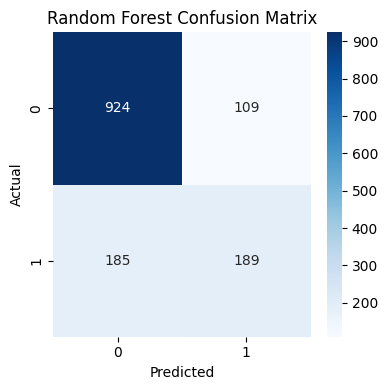

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("D:\GOPU\DATA SCIENCE\GITHUB_PRO\customer-churn-prediction\images/confusion_matrix_rf.png")
plt.show()


In [32]:
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance.head(10)

TotalCharges                      0.162201
tenure                            0.152086
MonthlyCharges                    0.139176
Unnamed: 0                        0.122108
InternetService_Fiber optic       0.039061
PaymentMethod_Electronic check    0.036041
Contract_Two year                 0.031853
gender_Male                       0.024150
OnlineSecurity_Yes                0.024048
PaperlessBilling_Yes              0.022000
dtype: float64

Contract type, tenure, and monthly charges are the strongest predictors of churn.